# Librerías

In [1]:
import numpy as np
from scipy.io import wavfile
import IPython.display as ipd
from scipy import signal as sig
from scipy.linalg import solve_toeplitz
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%config InlineBackend.figure_format = 'svg'

import Funciones as Funciones
from NNMF_GIF import NNMF_GIF
from MetricasRendimiento import MetricasRendimiento

# Carga de la señal

In [2]:
with open("Señales Repositorio II Resampleadas/Listas señales/Hombre A.txt", "r") as f:
    archivos = [line.strip() for line in f]
#archivos = archivos[0]

fs_r = 8000
cmap = Funciones.parula_map
color_flujo = 'blue'
color_dflujo = 'red'
color_area = 'orange'
color_darea = 'g'
color_energia = 'magenta'
color_speech = 'black'
legend_loc = 'upper right'



In [3]:
error_1 = []
error_2 = []
etiqueta = []

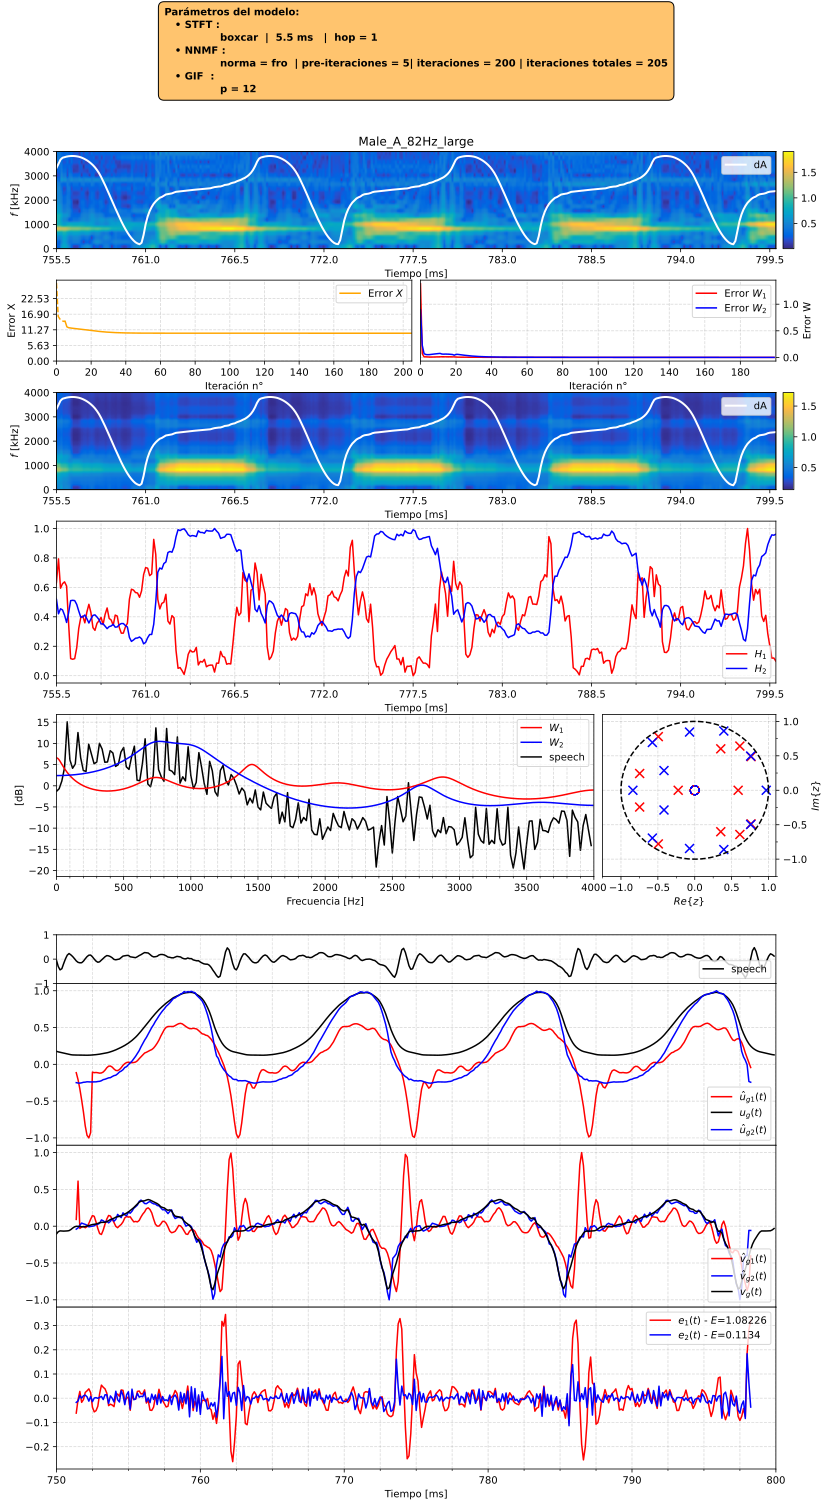

In [ ]:
#for archivo in archivos:
archivo = archivos[0]
fig = plt.figure(figsize=(10,25))
widths  = [1,1,1,1]
heights = [0.6,# Espectrograma original 
        0.5, #Error en las iteraciones NNMF 
        0.6,# Espectrograma aproximado
        1,# Plot  de H
        1,# Plot de W, polos y ceros
        0.3,# Plot del speech
        1,# Plot del flujo
        1,# Plot de la derivada
        1 # Plot del error
        ]
gs  = fig.add_gridspec(9, 4,width_ratios=widths,height_ratios=heights,left=0,right=1,wspace=0.05,hspace=0.25)
# Espectrograma original
ax0 = fig.add_subplot(gs[0, :])
# Error en las iteraciones NNMF
ax1  = fig.add_subplot(gs[1,0:2])
ax1_  = fig.add_subplot(gs[1,2:4])
# Espectrograma aproximado
ax2 = fig.add_subplot(gs[2, :])
# Plot  de H
ax3 = fig.add_subplot(gs[3, :])
# Plot de W
ax4 = fig.add_subplot(gs[4,0:3])
# Polos y ceros
ax5 = fig.add_subplot(gs[4,3])
# Speech
ax6 = fig.add_subplot(gs[5,:])
# Flujos
ax7 = fig.add_subplot(gs[6,:])
# Derivadas
ax8 = fig.add_subplot(gs[7,:])
# Error
ax9 = fig.add_subplot(gs[8,:])

señales       = np.loadtxt("Señales Repositorio II Resampleadas/"+archivo+".txt", delimiter="\t")
tiempos_      = señales[:, 0]
señal_speech_ = señales[:, 1]
señal_flujo_  = señales[:, 2]
señal_dflujo_ = señales[:, 3]
señal_area_   = señales[:, 4]
señal_darea_  = señales[:, 5]
to = 750
tf = 800
no = int(np.round(to *fs_r/1000)) 
nf = int(np.round(tf * fs_r/1000))
tiempos       = tiempos_[no:nf]

señal_speech  = señal_speech_[no:nf]
señal_flujo   = señal_flujo_[no:nf]
señal_dflujo   = señal_dflujo_[no:nf]
señal_area    = señal_area_[no:nf]
señal_darea   = señal_darea_[no:nf]

SP1 = NNMF_GIF(señal_speech,tiempos,fs_r,norma='fro',pre_iteraciones=5,iteraciones=200,p_filtro=12)

señal_flujo_rec  = señal_flujo[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1]
señal_dflujo_rec = señal_dflujo[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1]

flujo_1_rec = SP1.flujo1[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1]
flujo_2_rec = SP1.flujo2[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1]

dflujo_1_rec = SP1.dflujo1[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1]
dflujo_2_rec = SP1.dflujo2[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1]



flujo_1_rec = Funciones.Sincronizar(flujo_1_rec,señal_flujo_rec)
#flujo_1_rec = Funciones.Escalar(flujo_1_rec,señal_flujo_rec)

flujo_2_rec = Funciones.Sincronizar(flujo_2_rec,señal_flujo_rec)
#flujo_2_rec = Funciones.Escalar(flujo_2_rec,señal_flujo_rec)

dflujo_1_rec = Funciones.Sincronizar(dflujo_1_rec,señal_dflujo_rec)
dflujo_1_rec = Funciones.Escalar(dflujo_1_rec,señal_dflujo_rec)

dflujo_2_rec = Funciones.Sincronizar(dflujo_2_rec,señal_dflujo_rec)
dflujo_2_rec = Funciones.Escalar(dflujo_2_rec,señal_dflujo_rec)




MR1 = MetricasRendimiento(señal_dflujo[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1],
                        Funciones.Sincronizar(SP1.dflujo1[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1],
                                                señal_dflujo[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1]),
                                                fs_r,tiempos)
MR2 = MetricasRendimiento(señal_dflujo[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1],
                        Funciones.Sincronizar(SP1.dflujo2[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1],
                                                señal_dflujo[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1])
                                                ,fs_r,tiempos)

fw1,hw1 = sig.freqz([1],SP1.a_W1,fs=fs_r)
fw2,hw2 = sig.freqz([1],SP1.a_W2,fs=fs_r)

color2 = 'blue'
color1 = 'red'
color_error = 'green'
loc = 'lower right'
fftseñal,fseñal = Funciones.FFT(señal_speech,fs_r)


#=================================    Arrancan los plots   ================================================================================================= 

# ===============================  Espectrograma original ==============================================================================================

espect = ax0.imshow(SP1.espectrograma,cmap = cmap,origin='lower',aspect='auto',extent=[SP1.to_espec,SP1.tf_espec,SP1.fo_espec,SP1.ff_espec]);
ax0.set_ylabel(r"$f$ [kHz]");
ax0.set_title(archivo)

# Como poner el colorbar por fuera del plot (según la IA de google)
# Obtener la posición del eje principal
bbox = ax0.get_position()
width = 0.015
eps = 0.01
# Crear un nuevo eje para la barra de colores
# [x0, y0, ancho, alto]
cax = fig.add_axes([bbox.x1 + eps, bbox.y0, width, bbox.height])
# Añadir la barra de colores usando el nuevo eje
cbar = fig.colorbar(espect, cax=cax)


ax0_ = ax0.twinx()
ax0_.plot(tiempos[SP1.long_ventana_espect-1:],señal_darea[SP1.long_ventana_espect-1:],color='white',label="dA",linewidth=2);
ax0_.legend(loc='upper right');
ax0_.set_xlim(SP1.to_espec,SP1.tf_espec)
ax0_.set_xticks(np.arange(SP1.to_espec,SP1.tf_espec,SP1.duracion_ventana))
ax0_.set_yticks([])
ax0.set_xlabel('Tiempo [ms]');

# ===============================  Errores de aproximacion ==============================================================================================

ax1.plot(np.arange(0,SP1.pre_iter+1,1),SP1.error_NNMF[np.arange(0,SP1.pre_iter+1,1)],color='orange',linestyle='dashed')
ax1.plot(np.arange(SP1.pre_iter,SP1.total_iter+1,1),SP1.error_NNMF[np.arange(SP1.pre_iter,SP1.total_iter+1,1)],color='orange',label=f"Error $X$")
ax1.set_xlabel("Iteración n°")
ax1.set_ylim(0,max(SP1.error_NNMF)+1)
ax1.set_ylabel("Error X")
ax1.set_yticks(np.arange(0,max(SP1.error_NNMF),max(SP1.error_NNMF)/5))
ax1.set_xticks(np.arange(0,SP1.total_iter,round(SP1.total_iter/10)))
ax1.set_xlim(0,SP1.max_iter+SP1.pre_iter)
ax1.grid(True,linestyle='dashed',color='gray',alpha=0.3,)
ax1.legend(loc='upper right');

#ax1_ = ax1.twinx()
ax1_.yaxis.tick_right()
ax1_.yaxis.set_label_position("right")
ax1_.plot(np.arange(0,SP1.max_iter,1),SP1.error_W1,color=color1,label=r"Error $W_1$")
ax1_.plot(np.arange(0,SP1.max_iter,1),SP1.error_W2,color=color2,label=r"Error $W_2$")
ax1_.set_ylabel("Error W")
ax1_.set_xlabel("Iteración n°")
ax1_.set_xticks(np.arange(0,SP1.max_iter,round(SP1.max_iter/10)))
ax1_.set_xlim(0,SP1.max_iter)
ax1_.grid(True,linestyle='dashed',color='gray',alpha=0.3,)
ax1_.legend(loc='upper right');

# ===============================  Espectrograma aproximado ==============================================================================================


espect = ax2.imshow(SP1.espectrograma_aprox,cmap = cmap,origin='lower',aspect='auto',extent=[SP1.to_espec,SP1.tf_espec,SP1.fo_espec,SP1.ff_espec]);
ax2.set_ylabel(r"$f$ [kHz]");

# Como poner el colorbar por fuera del plot (según la IA de google)
# Obtener la posición del eje principal
bbox = ax2.get_position()
width = 0.015
eps = 0.01
# Crear un nuevo eje para la barra de colores
# [x0, y0, ancho, alto]
cax = fig.add_axes([bbox.x1 + eps, bbox.y0, width, bbox.height])
# Añadir la barra de colores usando el nuevo eje
cbar = fig.colorbar(espect, cax=cax)
ax2_ = ax2.twinx()
ax2_.plot(tiempos[SP1.long_ventana_espect:],señal_darea[SP1.long_ventana_espect:],color='white',label="dA",linewidth=2);
ax2_.legend(loc='upper right');
ax2_.set_xlim(SP1.to_espec,SP1.tf_espec)
ax2_.set_xticks(np.arange(SP1.to_espec,SP1.tf_espec,SP1.duracion_ventana))
ax2_.set_yticks([])
ax2.set_xlabel('Tiempo [ms]');


# ===============================  Funciones de activación  ==============================================================================================

ax3.plot(SP1.tiempos[SP1.long_ventana_espect-1:],SP1.H1,color=color1,label=r'$H_1$')
ax3.plot(SP1.tiempos[SP1.long_ventana_espect-1:],SP1.H2,color=color2,label=r'$H_2$')
ax3.set_xlim(SP1.to_espec,SP1.tf_espec)
ax3.set_xticks(np.arange(SP1.to_espec,SP1.tf_espec,SP1.duracion_ventana))
ax3.set_xticks(np.arange(SP1.to_espec,SP1.tf_espec,SP1.duracion_ventana/2),minor=True)
ax3.grid(True,linestyle='dashed',color='gray',alpha=0.3,which='both')
ax3.legend(loc=loc);
ax3.set_xlabel('Tiempo [ms]');
# ===============================  Respuesta en frecuencia de W1 y W2 ==============================================================================================

ax4.plot(fw1,10*np.log10(np.abs(hw1)),label=r'$W_1$',color=color1)
ax4.plot(fw2,10*np.log10(np.abs(hw2)),label=r'$W_2$',color=color2)
ax4.plot(fseñal,10*np.log10(np.abs(fftseñal)),label='speech',color=color_speech,zorder=-1)
ax4.set_xlim(0,fs_r/2);
ax4.set_xticks(np.arange(0,fs_r/2,100),minor=True)
ax4.grid(True,linestyle='dashed',color='gray',alpha=0.3,which='both')
ax4.set_xlabel('Frecuencia [Hz]');
ax4.set_ylabel('[dB]');
ax4.legend(loc='upper right');

# ===============================  Polos y ceros ==============================================================================================

theta = np.linspace(0, 2*np.pi, 200)

ax5.plot(np.cos(theta), np.sin(theta), 'k--', alpha=1)
ax5.yaxis.tick_right()
ax5.yaxis.set_label_position("right")
# Graficar ceros (O) y polos (X)
ax5.scatter(np.real(SP1.ceros_W1), np.imag(SP1.ceros_W1), s=80, facecolors='none', edgecolors=color1, label='Ceros')
ax5.scatter(np.real(SP1.polos_W1), np.imag(SP1.polos_W1), s=80, marker='x', color=color1, label='Polos')

# Graficar ceros (O) y polos (X)
ax5.scatter(np.real(SP1.ceros_W2), np.imag(SP1.ceros_W2), s=80,linestyle='dashed', facecolors='none', edgecolors=color2, label='Ceros')
ax5.scatter(np.real(SP1.polos_W2), np.imag(SP1.polos_W2), s=80, marker='x', color=color2, label='Polos')
ax5.set_xticks(np.arange(-1.25,1.25,0.25),minor=True)
ax5.set_yticks(np.arange(-1.25,1.25,0.25),minor=True)

ax5.set_ylabel(r"$Im\{z\}$")
#ax5_.set_ylim([-1.75,1.75])
ax5.set_xlabel(r"$Re\{z\}$")
ax5.grid(True,linestyle='dashed',color='gray',alpha=0.3)

#ax5.grid(True,linestyle='dashed',color='gray',alpha=0.3)

# ===============================  Señal de voz  ==============================================================================================

pos6 = ax6.get_position()
ax6.set_position([pos6.x0, pos6.y0 - 0.015, pos6.width, pos6.height]) 
ax6.plot(tiempos,señal_speech,color=color_speech,label='speech');
ax6.set_xlim([to,tf]);
ax6.set_xticks(np.arange(to,tf,2.5),minor=True)
ax6.grid(True,linestyle='dashed',color='gray',alpha=0.25,which='both')
ax6.tick_params(axis='x', which='both', length=0, labelbottom=False)

ax6.legend(loc=loc);

#ax6.set_xlabel('Tiempo [ms]');
ax6.set_ylim(-1,1)
#pos = ax6.get_position()
#ax6.set_position([pos.x0, pos.y0 - 0.01, pos.width, pos.height])  # baja ax2 0.05

# ===============================  Flujos glóticos ==============================================================================================

ax7.plot(tiempos[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1],
        flujo_1_rec,
        color=color1,label=r'$\hat{u}_{g1}(t)$');
ax7.plot(tiempos,señal_flujo,color=color_speech,label=r'$u_g(t)$');
ax7.plot(tiempos[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1],
        flujo_2_rec,
        color=color2,label=r'$\hat{u}_{g2}(t)$');
ax7.set_xlim([to,tf]);
ax7.set_xticks(np.arange(to,tf,2.5),minor=True)
ax7.grid(True,linestyle='dashed',color='gray',alpha=0.3,which='both')
ax7.legend(loc=loc);
#ax7.set_xlabel('Tiempo [ms]');
ax7.tick_params(axis='x', which='both', length=0, labelbottom=False)

#  Eliminar espacio entre ax[1] y ax[2]
pos6 = ax6.get_position()
pos7 = ax7.get_position()

# Muevo ax7 hacia arriba justo debajo de ax2
ax7.set_position([pos7.x0, pos6.y0 - pos7.height, pos7.width, pos7.height])

# ===============================  Funciones glóticas  ==============================================================================================

ax8.plot(tiempos[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1],
        Funciones.Sincronizar(SP1.dflujo1[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1],señal_dflujo[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1]),
        color=color1,label=r'$\hat{v}_{g1}(t)$');
ax8.plot(tiempos[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1],
        Funciones.Sincronizar(SP1.dflujo2[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1],señal_dflujo[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1]),
        color=color2,label=r'$\hat{v}_{g2}(t)$');
ax8.plot(tiempos,señal_dflujo,color=color_speech,label=r'$v_g(t)$');
ax8.set_xlim([to,tf]);
ax8.set_xticks(np.arange(to,tf,2.5),minor=True)
ax8.tick_params(axis='x', which='both', length=0, labelbottom=False)
ax8.grid(True,linestyle='dashed',color='gray',alpha=0.3,which='both')
ax8.legend(loc=loc);
#ax8.set_xlabel('Tiempo [ms]');

pos8 = ax8.get_position()
pos7 = ax7.get_position()
ax8.set_position([pos8.x0, pos7.y0 - pos8.height, pos8.width, pos8.height])

# ===============================  Error de predicción  ==============================================================================================

ax9.plot(tiempos[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1],
        SP1.error_predic1[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1],
        color=color1,label=r'$e_1(t)$'+str(' - ')+r'$E$={}'.format(round(MR1.Error,5)));
ax9.plot(tiempos[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1],
        SP1.error_predic2[SP1.orden_filtro_tracto-1:len(tiempos)-SP1.orden_filtro_tracto-1],
        color=color2,label=r'$e_2(t)$'+str(' - ')+r'$E$={}'.format(round(MR2.Error,5)));
ax9.legend(loc='upper right');
ax9.set_xlim([to,tf]);
ax9.set_xticks(np.arange(to,tf,2.5),minor=True)
ax9.grid(True,linestyle='dashed',color='gray',alpha=0.3,which='both')
ax9.set_xlabel('Tiempo [ms]');
# 🧷 Eliminar espacio entre ax[1] y ax[2]
pos8 = ax8.get_position()
pos9 = ax9.get_position()
# Muevo ax3 hacia arriba justo debajo de ax2
ax9.set_position([pos9.x0, pos8.y0 - pos9.height, pos9.width, pos9.height])

error_1.append(round(MR1.Error,5))
error_2.append(round(MR2.Error,5))
etiqueta.append(archivo)
# ===============================  Recuadro con los parámetros del modelo ==============================================================================================
fig.text(
0.5, 0.96,  # centrado horizontalmente respecto a la figura
f"Parámetros del modelo:\n"
f"   • STFT : \n                {SP1.ventana}  |  {SP1.duracion_ventana:.1f} ms   |  hop = {SP1.desplazamiento}\n"
f"   • NNMF : \n                norma = {SP1.norma}  | pre-iteraciones = {SP1.pre_iter}| iteraciones = {SP1.max_iter} | iteraciones totales = {SP1.total_iter}\n"
f"   • GIF  : \n                p = {SP1.orden_filtro_tracto}",
ha='center', va='top',                 # centra el recuadro
multialignment='left',                 # alinea el texto la izquierda
fontsize=10, fontweight='bold',
linespacing=1.4,
bbox=dict(facecolor=(1, 0.765, 0.424, 0.988), edgecolor='black', boxstyle='round,pad=0.6')
);
#fig.savefig("Prueba Repositorio II/Todas v2/"+archivo+'.pdf',bbox_inches = 'tight');
#plt.close();

In [5]:
#Funciones.unir_pdfs("Prueba Repositorio II/Todas v2/","Combinados_Fro.pdf")

In [6]:
SP1.error_W1

array([1.37324507, 0.06676292, 0.00763545, 0.00731706, 0.00673508,
       0.00731955, 0.00834111, 0.00936736, 0.01022853, 0.01086443,
       0.01126155, 0.00875674, 0.00619441, 0.00556821, 0.00535713,
       0.0052491 , 0.00516835, 0.00509768, 0.00503383, 0.00497493])